In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def aff_donnees(X,y,bornex,borney,s): 
  plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter');
  plt.xlim(bornex); 
  plt.ylim(borney);

In [37]:
X = np.asarray([ [0  , 0 ] , [2  , 2] , [2 , 0] ,[3 , 0]])
y = np.asarray([-1 , -1 , 1 , 1 ])

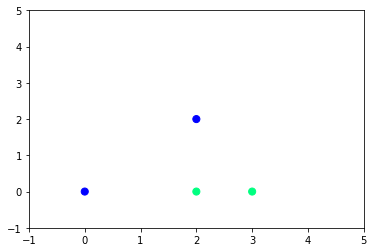

In [72]:
bornex = [-1,5]
borney = [-1,5]
s = 50
aff_donnees(X,y,bornex,borney,50)

In [80]:
def affichePlan(w,b,bornex) :
  a = (w[1] - b)/w[0] #coeff directeur , a trouver avec w et b 
  print(a)
  # w ==(x,y) , un coupe de points 
  hyperplan = np.array([ (a*x + b) for x in np.arange(-1,5,1) ])
  plt.plot(hyperplan)


1.1


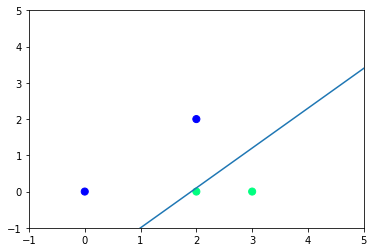

In [81]:
w = np.array([1, 0.1]) ; b =-1
affichePlan(w,b,[0,5])
# print(len(mon_plan))
aff_donnees(X,y,bornex,borney,50)
plt.show()




In [86]:
import cvxopt

def Resoud_primal(X,y): 
  N= np.shape(y)[0]
  n= np.shape(X)[1]
  q = np.zeros(n+1,1)
  P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1) 
  P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1) 
  P=np.concatenate((P1,P2),axis=0) 
  P=cvxopt.matrix(P) 
  for i in range(N): 
    g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1) 
    if i==0:
       G=g 
    else : 
      G=np.concatenate((G, g), axis=0) 
  G=cvxopt.matrix(G+0.) 
  h = cvxopt.matrix(np.ones(N,1))
  sol = cvxopt.solvers.qp(P ,q , G , h)
  x= sol['x'] 
  b= x[1]
  w= x[0]
  return w,b

In [87]:
w,b = Resoud_primal(X,y)

TypeError: ignored